# Setup


In [ ]:
!pip install DataSynthesizer

In [ ]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network
from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def generate_data_A(input_data_file, output_data_size, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['A']
    
    describer = DataDescriber()
    describer.describe_dataset_in_random_mode(input_data_file, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_random_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [ ]:
def generate_data_B(input_data_file, output_data_size, epsilon=0.1, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['B']
    
    describer = DataDescriber()
    describer.describe_dataset_in_independent_attribute_mode(input_data_file, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_independent_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [ ]:
def generate_data_CD(input_data_file, output_data_size, description_file, epsilon=0.5, k=1, seed=None):
    seed = seed or randint(0, 2**30)
    
    describer = DataDescriber()
    describer.describe_dataset_in_correlated_attribute_mode(input_data_file, k=k, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

def generate_data_C(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['C'], epsilon, k=1, seed=seed)

def generate_data_D(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['D'], epsilon, k=2, seed=seed)

Start with a real dataset __hw_compas__ and a fake dataset __hw_fake__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [ ]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. 
# Please follow the steps as instructed when you run the following commands. 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileid_compas = '1kgSIBkOM9y0nz_l8LI8ze9TAhF5gbb64'    
real_data_file = 'hw_compas.csv'

fileid_fake = '1b_T0SHQUMbVvZueZ6yXlxTKBHctMgM0k'    
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas}) 
downloaded.GetContentFile(real_data_file)  
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake}) 
downloaded.GetContentFile(fake_data_file)  
df_fake = pd.read_csv(fake_data_file)

In [ ]:
output_data_size = 10000
epsilon = 0.1

seed = 0  # make the entire notebook reproducible

description_files = {'A': './descrption_A.json', 
                     'B': './descrption_B.json', 
                     'C': './descrption_C.json', 
                     'D': './descrption_D.json'}

set_random_seed(seed)

df_real_A = generate_data_A(real_data_file, output_data_size)
df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

df_fake_A = generate_data_A(fake_data_file, output_data_size)
df_fake_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)

clear_output()

Calculate the Median, Mean, Min, Max of __age__ and __score__ for each A, B, C and D. Compare to the ground truth values in __hw_compas__, present results in a table.

In [ ]:
# Your code here
import numpy as np
#change this to something like this
#t_age = [df_real.age.mean(), df_real.age.min(), df_real.age.max(), df_real.age.median()]
t_age = np.array(df_real['age'].agg(['mean','min','max','median']))
t_score = np.array(df_real['score'].agg(['mean','min','max','median']))
ind_r_age = np.array(df_real_B['age'].agg(['mean','min','max','median']))
ind_r_score = np.array(df_real_B['score'].agg(['mean','min','max','median']))
rand_r_age = np.array(df_real_A['age'].agg(['mean','min','max','median']))
rand_r_score = np.array(df_real_A['score'].agg(['mean','min','max','median']))
corr_r_k2_age = np.array(df_real_D['age'].agg(['mean','min','max','median']))
corr_r_k2_score = np.array(df_real_D['score'].agg(['mean','min','max','median']))
corr_r_k1_age = np.array(df_real_C['age'].agg(['mean','min','max','median']))
corr_r_k1_score = np.array(df_real_C['score'].agg(['mean','min','max','median']))

answer_1 = pd.DataFrame(index = ['Mean', 'Min', 'Max', 'Median'],
                          columns = ['truth age', 'truth score', 'random real age', 'random real score', 
                                     'independent real age', 'independent real score', 'correlated k1 age', 'correlated k1 score',
                                     'correlated k2 age', 'correlated k2 score'])
answer_1['truth age'] = t_age
answer_1['truth score'] = t_score

answer_1['random real age']= rand_r_age
answer_1['random real score'] = rand_r_score

answer_1['independent real age'] = ind_r_age
answer_1['independent real score'] = ind_r_score

answer_1['correlated k1 age'] = corr_r_k1_age
answer_1['correlated k1 score'] = corr_r_k1_score

answer_1['correlated k2 age'] = corr_r_k2_age
answer_1['correlated k2 score'] = corr_r_k2_score

answer_1


,truth age,truth score,random real age,random real score,independent real age,independent real score,correlated k1 age,correlated k1 score,correlated k2 age,correlated k2 score
Mean,35.143319,4.371268,50.1731,4.9392,35.7354,4.3657,41.5788,4.9487,44.1532,4.466
Min,18.000000,-1.000000,0.0000,-1.0000,18.0000,1.0000,18.0000,-1.0000,18.0000,-1.000
Max,96.000000,10.000000,100.0000,10.0000,76.0000,10.0000,96.0000,10.0000,96.0000,10.000
Median,32.000000,4.000000,51.0000,5.0000,33.0000,4.0000,36.0000,5.0000,39.0000,4.000



Plot histograms of the age attribute in hw_compas and in synthetic datasets generated under settings A and B.

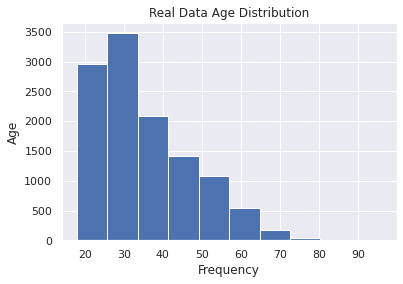

In [ ]:
#add color argument into line below
#ie: plt.hist(df_real.age, color = 'green')
plt.hist(df_real['age'])
title = 'Real Data Age Distribution'
plt.title(title)
plt.xlabel('Frequency')
plt.ylabel('Age')
color='green'
plt.plot(color=color)
plt.show()

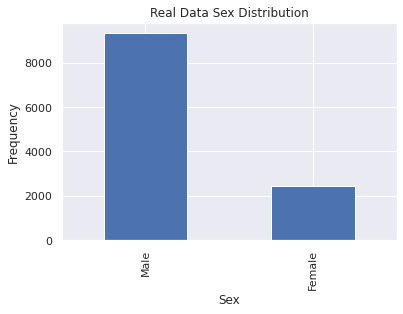

In [ ]:
df_real.sex.value_counts().plot(kind = 'bar', title = 'Real Data Sex Distribution', xlabel = 'Sex', ylabel = 'Frequency')

Create bar plots for the sex attribute in hw_compas and in synthetic datasets generated under settings A and B.

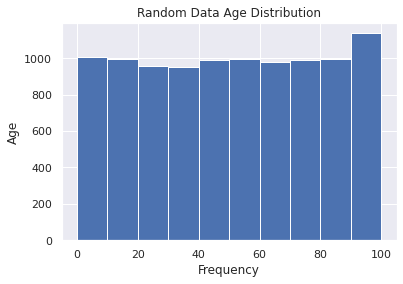

In [ ]:
plt.hist(df_real_A['age'])
title = 'Random Data Age Distribution'
plt.title(title)
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()

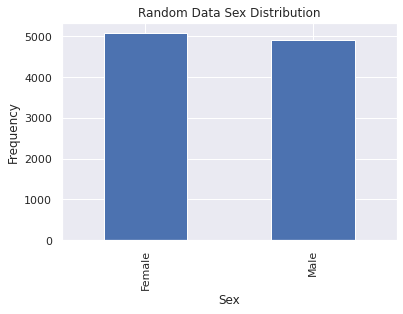

In [ ]:
df_real_A.sex.value_counts().plot(kind = 'bar', title = 'Random Data Sex Distribution', xlabel = 'Sex', ylabel = 'Frequency')

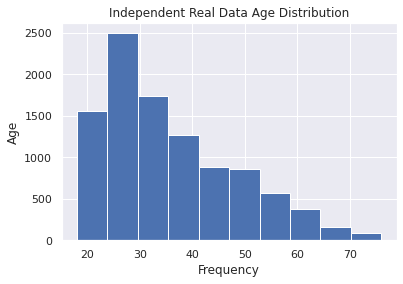

In [ ]:
plt.hist(df_real_B['age'])
title = 'Independent Real Data Age Distribution'
plt.title(title)
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()

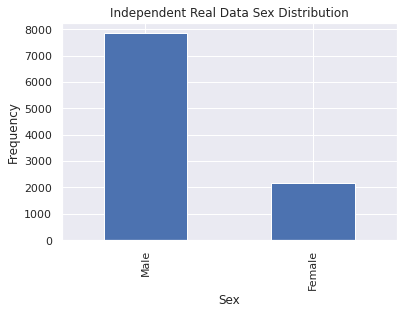

In [ ]:
df_real_B.sex.value_counts().plot(kind = 'bar', title = 'Independent Real Data Sex Distribution', xlabel = 'Sex', ylabel = 'Frequency')


The functions below can be used to compute two statistical measures: __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__.

### Two-sample Kolmogorov–Smirnov test for continuous attributes

Use the `ks_test` function to run the Kolomogorov-Smirnov test on the age attribute. You should first test `df_real` against `df_real_A` and then test `df_real` against `df_real_B`.

In [ ]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

In [ ]:
# Your code here
#split this into KS+KL combo
#ie: print the KS+KL scores for df_real_A in one cell, then again for df_real_B
df_real_A_ks_test = ks_test(df_real,df_real_A,'age')
df_real_B_ks_test = ks_test(df_real,df_real_B,'age')
print(f' KS test for age between Truth and Random:  {df_real_A_ks_test} ')
print(f' KS test for age between Truth and Independent:  {df_real_B_ks_test}')


 KS test for age between Truth and Random:  0.3735091775112699 
 KS test for age between Truth and Independent:  0.026252445351705345


### KL-divergence for categorical attributes

Use the `kl_test` function to calculate the KL-divergence on the sex attribute. You should first run `df_real` against `df_real_A` and then run `df_real` against `df_real_B`.

In [ ]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [ ]:
# Your code here
df_real_A_kl_test = kl_test(df_real,df_real_A,'sex')
df_real_B_kl_test = kl_test(df_real,df_real_B,'sex')

print(f' KL test for age between Truth and Random:  {df_real_A_kl_test} ')
print(f' KL test for age between Truth and Independent:  {df_real_B_kl_test}')

 KL test for age between Truth and Random:  0.22319792405369002 
 KL test for age between Truth and Independent:  0.0002494300869420041


In [ ]:
df_real_A_ks_test = ks_test(df_real,df_real_A,'age')
print(f' KL test for age between Truth and Random:  {df_real_A_kl_test} ')
df_real_A_kl_test = kl_test(df_real,df_real_A,'sex')
print(f' KL test for age between Truth and Random:  {df_real_A_kl_test} ')


Calculate the pairwise mutual information matrix for `df_fake`, `df_fake_C`, and `df_fake_D`.

In [ ]:
# Use pairwise_attributes_mutual_information function
# For function parameters, refer to https://github.com/DataResponsibly/DataSynthesizer/blob/master/DataSynthesizer/lib/utils.py#L31

# Your code here

import json
import random
from string import ascii_lowercase

import numpy as np
from pandas import Series, DataFrame
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score

def mutual_information(labels_x: pd.Series, labels_y: pd.DataFrame):
    """Mutual information of distributions in format of Series or DataFrame.
    Parameters
    ----------
    labels_x : Series
    labels_y : DataFrame
    """
    if labels_y.shape[1] == 1:
        labels_y = labels_y.iloc[:, 0]
    else:
        labels_y = labels_y.apply(lambda x: ' '.join(x.values), axis=1)

    return mutual_info_score(labels_x, labels_y)


def pairwise_attributes_mutual_information(dataset):
    """Compute normalized mutual information for all pairwise attributes. Return a DataFrame."""
    sorted_columns = sorted(dataset.columns)
    mi_df = pd.DataFrame(columns=sorted_columns, index=sorted_columns, dtype=float)
    for row in mi_df.columns:
        for col in mi_df.columns:
            mi_df.loc[row, col] = normalized_mutual_info_score(dataset[row].astype(str),
                                                               dataset[col].astype(str),
                                                               average_method='arithmetic')
    return mi_df
  
pw = pairwise_attributes_mutual_information(df_fake)
pw_k1 = pairwise_attributes_mutual_information(df_fake_C)
pw_k2 = pairwise_attributes_mutual_information(df_fake_D)

Plot each pairwise mutual information matrix below using `sns.heatmap`. You should set `vmax=1` and `vmin=0` in your call to `sns.heatmap`.

Pairwise Mutual Information:
           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.211242  0.214345  0.195899
child_2   0.211242  1.000000  0.208301  0.200690
parent_1  0.214345  0.208301  1.000000  0.002421
parent_2  0.195899  0.200690  0.002421  1.000000


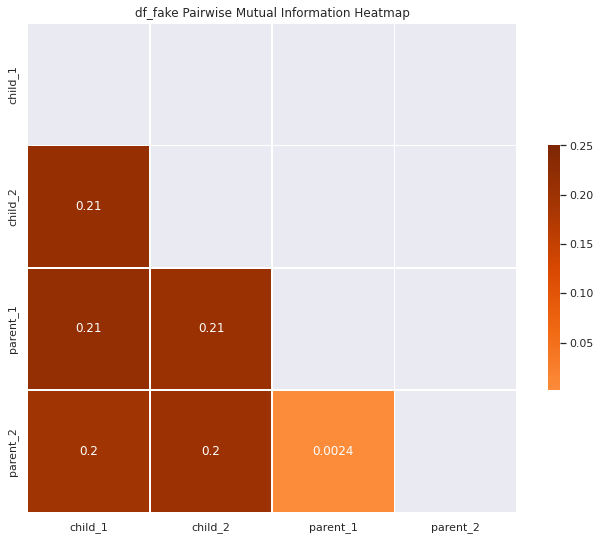

In [ ]:
# Use can sns.heatmap for pairwise mutual information
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Your code here
print('Pairwise Mutual Information:')
print(pw)
sns.set_theme(style="darkgrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pw, dtype=bool))
# Set up the matplotlib figure
ax1 = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
c = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
ax = plt.axes()
sns.heatmap(pw, mask=mask,cmap="Oranges",center=0, vmin=.002,vmax=.25,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=ax,annot=True)
ax.set_title('df_fake Pairwise Mutual Information Heatmap')
plt.show()

Pairwise w/ Correlation k=1:
           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.229400  0.070395  0.026739
child_2   0.229400  1.000000  0.249762  0.114695
parent_1  0.070395  0.249762  1.000000  0.028520
parent_2  0.026739  0.114695  0.028520  1.000000


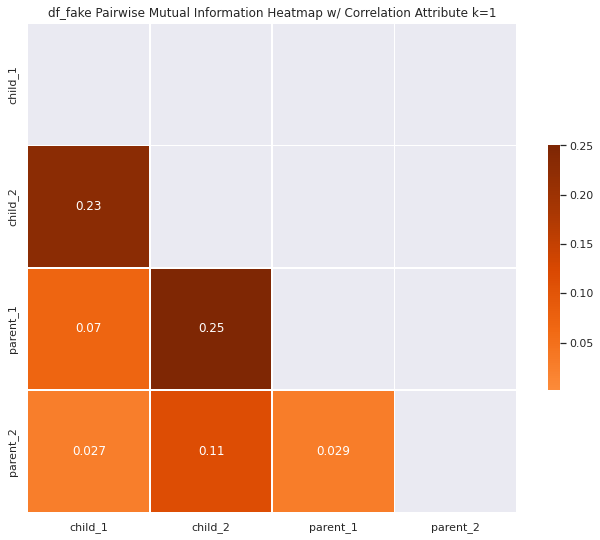

In [ ]:
print('Pairwise w/ Correlation k=1:')
print(pw_k1)
sns.set_theme(style="darkgrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pw_k1, dtype=bool))
# Set up the matplotlib figure
ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
c = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
ax = plt.axes()
sns.heatmap(pw_k1, mask=mask, cmap="Oranges",center=0,vmin=.002,vmax=.25,
           square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=ax,annot=True)
ax.set_title('df_fake Pairwise Mutual Information Heatmap w/ Correlation Attribute k=1')
plt.show()

Pairwise w/ Correlation k=2:
           child_1   child_2  parent_1  parent_2
child_1   1.000000  0.074153  0.034209  0.221418
child_2   0.074153  1.000000  0.203135  0.110479
parent_1  0.034209  0.203135  1.000000  0.073704
parent_2  0.221418  0.110479  0.073704  1.000000


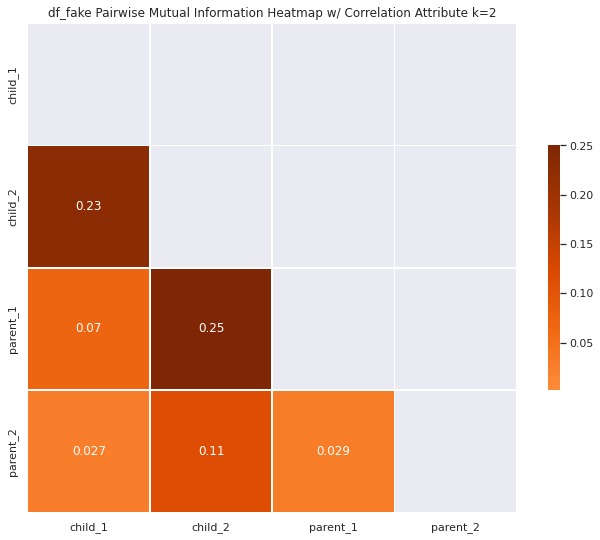

In [ ]:
print('Pairwise w/ Correlation k=2:')
print(pw_k2)
sns.set_theme(style="darkgrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pw_k1, dtype=bool))
# Set up the matplotlib figure
ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
c = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
ax = plt.axes()
sns.heatmap(pw_k1, mask=mask, cmap="Oranges",center=0,vmin=.002,vmax=.25,
           square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=ax,annot=True)
ax.set_title('df_fake Pairwise Mutual Information Heatmap w/ Correlation Attribute k=2')
plt.show()


With epsilon = 0.1, generate __10__ synthetic datasets for each of mode A, B, and C by specifying different seeds. (You should generate 30 datasets in total: 10 for setting A, 10 for setting B, 10 for setting C). Calculate the mean and median in each dataset. We recommend using a for loop here, e.g. `for rep in range(10):`

In [ ]:
set_random_seed(seed) # this will specify different seeds
dc = {'Mode':[],'Data':[],'Median': [],'Mean': [], 'Min': [],'Max': []}
  
result = pd.DataFrame(dc)

describer = DataDescriber()
generator = DataGenerator()

for rep in range(10):
  # Your code here
  synth_files = {
                      'independent attribute mode':    'synthetic data(independent attribute mode).csv',
                     'correlated attribute mode k1':     'synthetic data(correlated attribute mode k1).csv',
                     'random mode':     'synthetic data(random mode).csv'}
  desc_files = {
                     'independent attribute mode':    'description(independent).json',
                     'correlated attribute mode k1':     'description(correlated k1).json',
                     'random mode':     'description(random mode).json'}
  s = randint(0,100)
  
 
  ##independent 
  describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=0.1)
  describer.save_dataset_description_to_file(desc_files['independent attribute mode'])

  generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                          description_file=desc_files['independent attribute mode'], 
                                          seed=seed)
  
  generator.save_synthetic_data(synth_files['independent attribute mode'])
  i = pd.read_csv(synth_files['independent attribute mode'])
   
  
  d = {'Mode': 'Independent','Data': i,'Median': i.age.median(),'Mean':i.age.mean(),'Min':i.age.min(),'Max':i.age.max()}
  result = result.append(d, ignore_index = True)


  seed= randint(0,100)
  
  #Correlated k=1
  describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                        epsilon=0.1, 
                                                        k=1)

  display_bayesian_network(describer.bayesian_network)
  describer.save_dataset_description_to_file(desc_files['correlated attribute mode k1'])

  generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size,
                                                        description_file=desc_files['correlated attribute mode k1'],
                                                        seed=seed)
  generator.save_synthetic_data(synth_files['correlated attribute mode k1'])
  c_k1 = pd.read_csv(synth_files['correlated attribute mode k1'])

  d = {'Mode': 'Correlated K=1','Data': c_k1,'Median': c_k1.age.median(),'Mean':c_k1.age.mean(),'Min':c_k1.age.min(),'Max':c_k1.age.max()}
  result = result.append(d, ignore_index = True)

  s = randint(0,100)
  
  #Random
  describer.describe_dataset_in_random_mode(real_data_file)
  describer.save_dataset_description_to_file(desc_files['random mode'])

  generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=desc_files['random mode'], 
                                          seed=seed)

  generator.save_synthetic_data(synth_files['random mode'])
  r = pd.read_csv(synth_files['random mode'])
 
  d = {'Mode': 'Random','Data': r,'Median': r.age.median(),'Mean':r.age.mean(),'Min':r.age.min(),'Max':r.age.max()}
  result = result.append(d, ignore_index = True)


================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute race
Adding attribute sex
========================== BN constructed ==========================
Constructed Bayesian network:
    age  has parents ['score'].
    race has parents ['score'].
    sex  has parents ['age'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute race
Adding attribute sex
========================== BN constructed ==========================
Constructed Bayesian network:
    age  has parents ['score'].
    race has parents ['score'].
    sex  has parents ['age'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute race
Adding attribute sex
========================== BN constructed ==========================
Constructed Bayesian network:
    age  has parents ['score'].
    race has parents ['score']

Plot the mean and the median values as box-and-whiskers plots. You should have two plots: one for the mean and one for the median. Put the mode (A, B, C) on the x-axis. The median/mean should be on the y-axis.

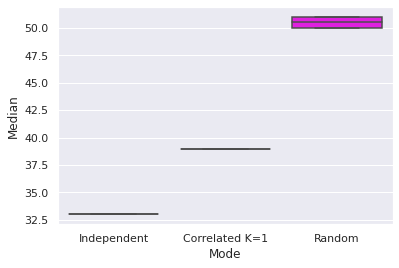

In [ ]:
# You can use sns.boxplot for the plots
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Your code here

sns.boxplot(y=result["Median"], x=result["Mode"], color='magenta')

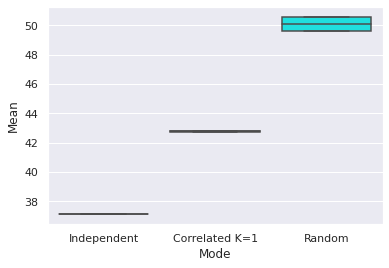

In [ ]:
sns.boxplot(y=result["Mean"], x=result["Mode"], color='cyan')

Study how the KL-divergence of the race attribute changes for settings B, C, and D as you vary your privacy budget __epsilon__ = [0.02, 0.04, ... , 0.1]. For each setting B, C, D, you should generate 10 synthetic data sets for each epsilon value (a total of 3 * 10 * 5 = 150 datasets). 

Hint: We recommend using a nested for loop and have provided some starter code in the cell below. You may use a different approach as you see fit.

In [ ]:
# generate the datasets and calculate KL-divergence in this cell
set_random_seed(seed)
epsilons = [0.02, 0.04, 0.06, 0.08, 0.1]
repeat = 10
describer = DataDescriber()
generator = DataGenerator()
dct = {'KL Score': [],'Mode':[],'Data':[],'Epsilon': []}
kl = pd.DataFrame(dct)
for i, epsilon in enumerate(epsilons):
    print(f'~~~ i={i}, epsilon={epsilon} ~~~')
    for rep in range(repeat):
      synth_files = {
                  'independent attribute mode':    'synthetic data(independent attribute mode).csv',
                  'correlated attribute mode k1':     'synthetic data(correlated attribute mode k1).csv',
                  'correlated attribute mode k2':     'synthetic data(correlated attribute mode k2).csv'}
      desc_files = {
                  'independent attribute mode':    'description(independent).json',
                  'correlated attribute mode k1':     'description(correlated k1).json',
                  'correlated attribute mode k2':     'description(correlated k2).json'}
      
      ##independent 
      describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=epsilon,seed=rep)
      describer.save_dataset_description_to_file(desc_files['independent attribute mode'])

      generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                      description_file=desc_files['independent attribute mode'], 
                                      seed=rep)

      generator.save_synthetic_data(synth_files['independent attribute mode'])
      id = pd.read_csv(synth_files['independent attribute mode'])

      kl_ts = ks_test(df_real,ind_syn,'race')
      d = {'KL Score': kl_test_score, 'Mode': 'Independent','Data': id,'Epsilon': i}
      kl = kl.append(d, ignore_index = True)


      #Correlated k=1
      describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                    epsilon=epsilon, 
                                                    k=1, seed=rep)

      display_bayesian_network(describer.bayesian_network)
      describer.save_dataset_description_to_file(desc_files['correlated attribute mode k1'])

      generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size,
                                                    description_file=desc_files['correlated attribute mode k1'],
                                                    seed=rep)
      generator.save_synthetic_data(synth_files['correlated attribute mode k1'])
      ck1_s = pd.read_csv(synth_files['correlated attribute mode k1'])

      kl_ts = ks_test(df_real,ck1_s,'race')
      d = {'KL Score': kl_ts, 'Mode': 'Correlated K=1','Data': ck1_s,'Epsilon': i}
      kl = kl.append(d, ignore_index = True)

      #Correlated k=2
      describer.describe_dataset_in_correlated_attribute_mode(real_data_file, 
                                                    epsilon=epsilon, 
                                                    k=2,seed=rep)

      display_bayesian_network(describer.bayesian_network)
      describer.save_dataset_description_to_file(desc_files['correlated attribute mode k2'])

      generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size,
                                                    description_file=desc_files['correlated attribute mode k2'],
                                                    seed=rep)
      generator.save_synthetic_data(synth_files['correlated attribute mode k2'])
      ck2_s = pd.read_csv(synth_files['correlated attribute mode k2'])

      kl_test_score = ks_test(df_real,ck2_s,'race')
      d = {'KL Score': kl_test_score, 'Mode': 'Correlated K=2','Data': ck2_s,'Epsilon': i}
      kl = kl.append(d, ignore_index = True)



~~~ i=0, epsilon=0.02 ~~~
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute race
Adding attribute sex
========================== BN constructed ==========================
Constructed Bayesian network:
    age  has parents ['score'].
    race has parents ['score'].
    sex  has parents ['age'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute race
Adding attribute sex
========================== BN constructed ==========================
Constructed Bayesian network:
    age  has parents ['score'].
    race has parents ['age', 'score'].
    sex  has parents ['race', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT age
Adding attribute race
Adding attribute score
Adding attribute sex
========================== BN constructed ==========================
Constructed Bayesian network:
    race  has paren

Create the box-and-whisker plots in the cell below.

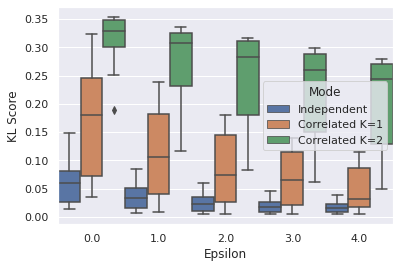

In [ ]:
# Your code here
sns.boxplot(y=kl["KL Score"], x=kl["Epsilon"],hue=kl['Mode'],width=1)

In [ ]:
plt.boxplot()

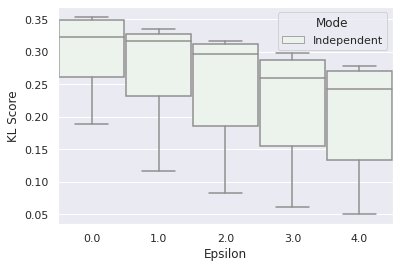

In [ ]:
kl_s_p = kl.loc[kl['Mode'] == 'Independent']
sns.boxplot(y=kl_s_p["KL Score"], x=kl_s_p["Epsilon"],hue=kl_s_p['Mode'],width=1, color='green')

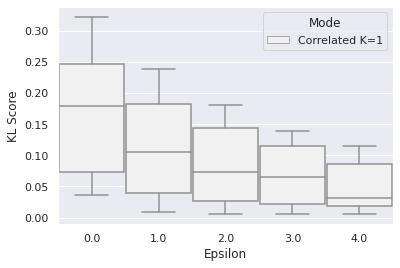

In [ ]:
kl_s_p = kl.loc[kl['Mode'] == 'Correlated K=1']
sns.boxplot(y=kl_s_p["KL Score"], x=kl_s_p["Epsilon"],hue=kl_s_p['Mode'],width=1, color='blue')